In [1]:
import pandas as pd
import os

from scipy import signal

import matplotlib.pyplot as plt

import numpy as np

from pydantic import BaseModel, Field
from typing import List

In [2]:
class CarpetRegion(BaseModel):
    start_hz: float = Field(..., description="Start frequency in Hz")
    end_hz: float = Field(..., description="End frequency in Hz")
class Wave(BaseModel):
    time: List[float] = Field(..., description="Time points of the wave")
    signal: List[float] = Field(..., description="Signal values")


class Model:
    def __init__(self, **params):
        # Store hyperparameters if needed
        self.params = params
    def predict(self, wave: Wave) -> List[CarpetRegion]:
        """
        Predict carpet regions from a given wave.
        This should be implemented with actual logic.
        """
        # Example placeholder
        raise NotImplementedError("Predict method not implemented.")


# def moving_average(x, w):
#     return np.convolve(x, np.ones(w), 'valid') / w

<Axes: >

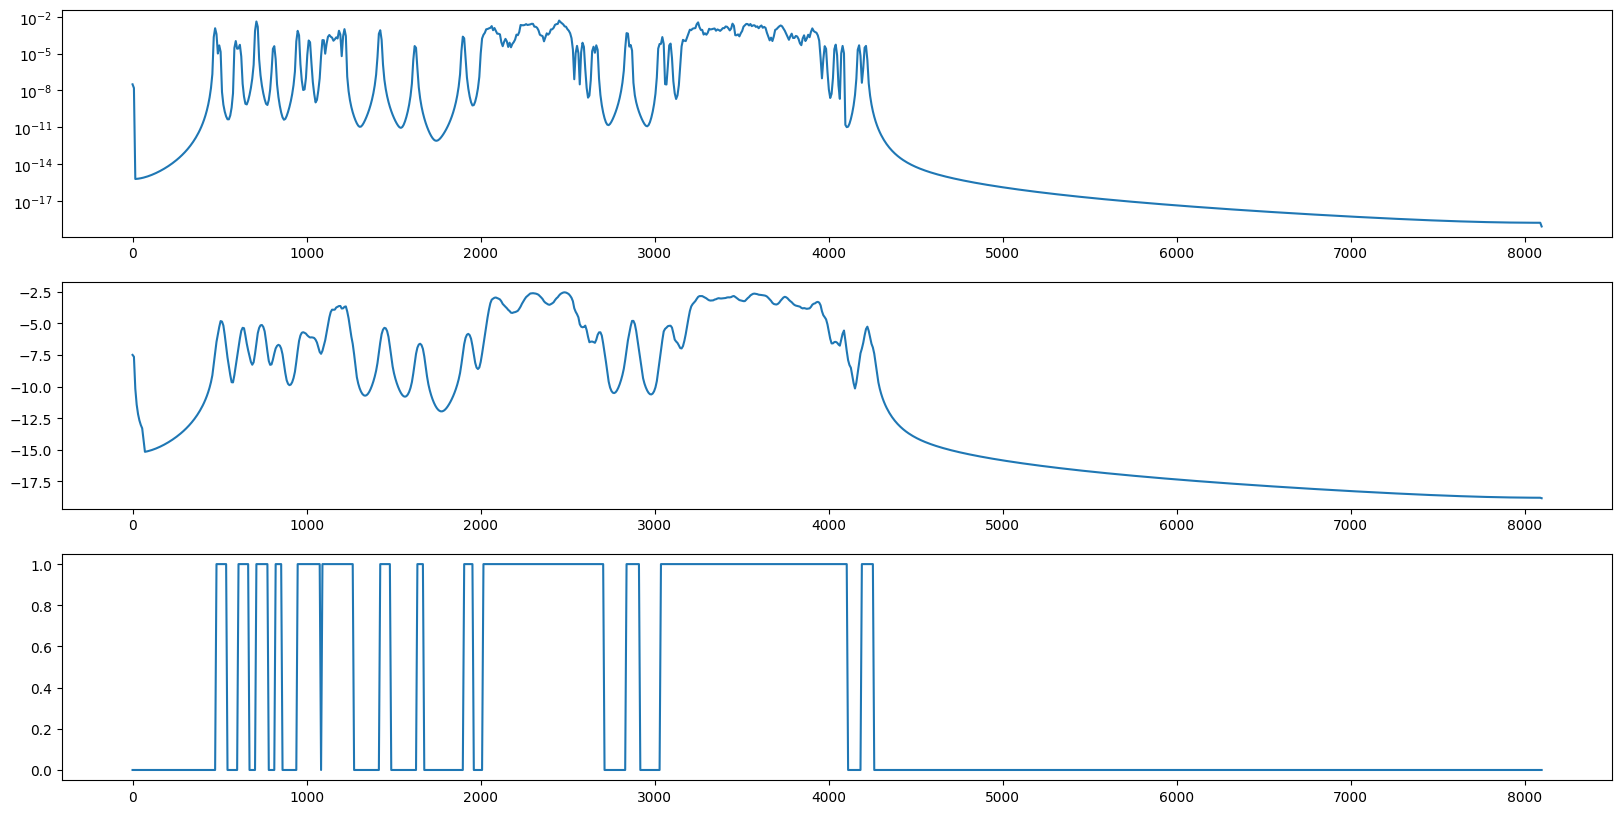

In [170]:
path = "./part_2/"
files = os.listdir(path)

data = pd.read_csv(path+files[1])

fs = data.shape[0] / data["t"].max()          # taxa de amostragem
f, Pxx = signal.welch(data["data"].to_numpy(), fs=fs, window='hann', nperseg=2048, noverlap=1024, scaling='density')

Pxx = pd.Series(Pxx,index=f)

fig,axs = plt.subplots(3,1,figsize=(20,10))
w = 8

axs[0].semilogy(f,Pxx)

loggedSignal = Pxx.apply(np.log10)
smoothedW = loggedSignal.rolling(min_periods=1,window=w).mean()
smoothedW.plot(ax=axs[1])
((smoothedW > loggedSignal.mean() + 0.75*loggedSignal.std())*1).plot(ax=axs[2])

In [159]:
loggedSignal.mean() + loggedSignal.std()

np.float64(-2.911815567045563)

In [48]:
loggedSignal = pd.Series(Pxx).apply(np.log10)


overPeaks = loggedSignal.loc[loggedSignal > loggedSignal.mean()]

overPeaks.std()

np.float64(2.6801801755555523)

In [179]:
fs = fs
nperseg = 1024
noverlap = 256
window = 'hann'

f, t, Zxx = signal.stft(
    data["data"].to_numpy(),
    fs=fs,
    window=window,
    nperseg=nperseg,
    noverlap=noverlap,
    return_onesided=True
)

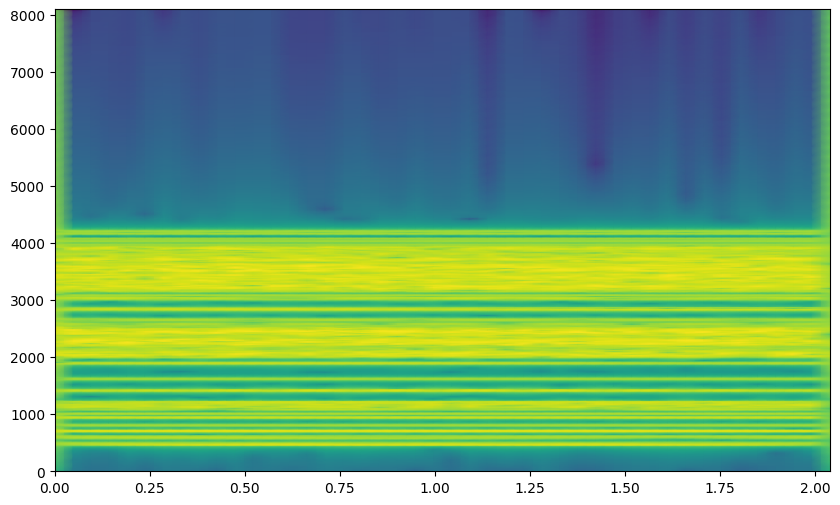

In [173]:
plt.figure(figsize=(10, 6))
plt.pcolormesh(t, f, np.log10(np.abs(Zxx)), shading='gouraud')

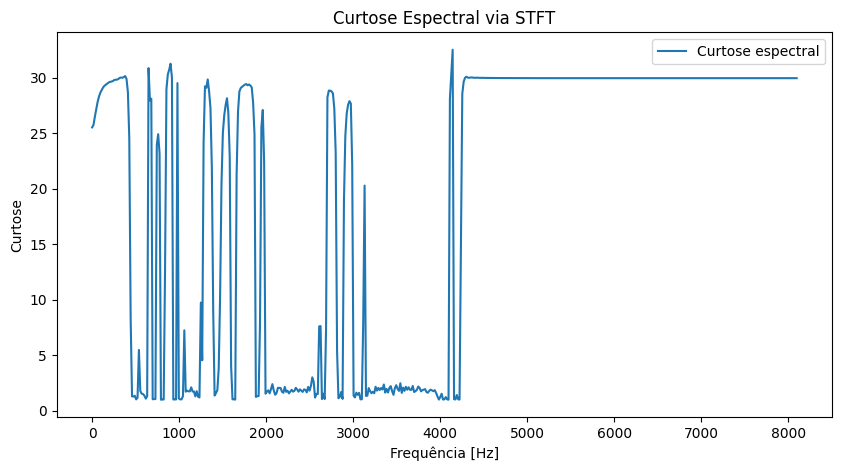

In [178]:
P = np.abs(Zxx)**2  # (freq x tempo)

# Média no tempo
m2 = np.mean(P, axis=1)      # segundo momento
m4 = np.mean(P**2, axis=1)   # quarto momento

# Curtose espectral
K = m4 / (m2**2)

# =========================
# 3. Plotar resultado
# =========================
plt.figure(figsize=(10,5))
plt.plot(f, K, label="Curtose espectral")
plt.xlabel("Frequência [Hz]")
plt.ylabel("Curtose")
plt.title("Curtose Espectral via STFT")
#plt.grid(True)
plt.legend()
plt.show()

In [8]:
condA = np.log10(Pxx) > np.log10(Pxx.mean())

condB = f>1000




In [177]:
K < 5

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True, False, False, False,  True,
        True,  True, False, False, False,  True,  True,  True, False,
       False, False, False, False, False,  True,  True,  True, False,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
       False, False, False, False, False, False, False, False,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True, False, False, False, False,
        True,  True,

<Axes: >

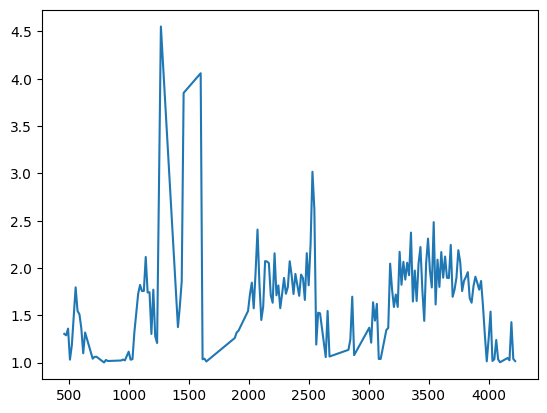

In [176]:
pd.Series(K,index=f).loc[K < 5].plot()

In [9]:
plt.plot(np.log10(Pxx[condA*condB]))

ValueError: operands could not be broadcast together with shapes (1025,) (513,) 

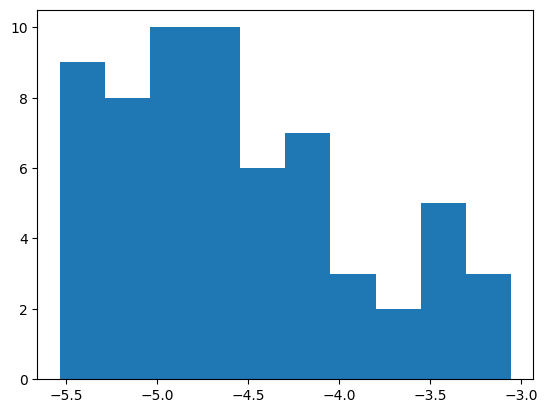

In [ ]:
count = plt.hist(np.log10(Pxx[condA*condB]), bins=10)

In [ ]:
smoothedW

0       -0.183216
1       -0.375986
2       -0.705095
3       -1.028860
4       -1.345958
          ...    
2044   -21.967253
2045   -21.967659
2046   -21.968043
2047   -21.968407
2048   -21.978156
Length: 2049, dtype: float64